# Personal eToro portfolio analysis  

This personal project analyzes my personal investment portfolio from eToro

In [65]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import seaborn as sns

In [87]:
# Defining functions for pipline


# function that gets datda from Yahoo Financials and calculates daily returns
def get_data(ticker, start='2019-1-1'):
    adj_close = pd.DataFrame()
    
    for t in tickers:
        print(t + '  data retrieved')
        adj_close[t] = wb.DataReader(t, data_source='yahoo', start=start)['Adj Close']
        
    returns = (adj_close / adj_close.shift(1)) - 1
    
    return adj_close, returns

# Function that normalizes a list between 0 and 1 
def normalize(lst):
    s = sum(lst)
    return list(map(lambda x: float(x)/s, lst))

# Correlation matrix plot
def plot_corr_matrix(corr):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 25))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
# define portfolio
tickers = ['GC=F', 'AMZN', 'NFLX', '^GSPC', 'HLT', 'COST',
          'WMT', 'CZR', 'VXX', 'MAR', 'F' ,'MC.PA', 'WIZZ.L', 'MCD', 'KER.PA', 'EZJ.L',
          'SBUX', 'RYAAY', 'DAL', 'H', 'EXPE', 'DIS', 'FB', 'TSCO.L', 'RACE', 'REGN', 'BKNG', 'UBER', 'DHR',
          'ZM', 'JPY=X', 'JBLU', 'ABT', 'OMI', 'WYND', 'JNJ', 'AAL']
start = '2019-1-1'

weights = np.array(normalize([42.49, 34.57, 27.78, 20.39, 14.15, 12.77, 11.07, 10.86, 10.25, 
                              9.95, 9.56, 9.20, 9.09, 8.85, 8.71, 8.28, 8.13, 8.06, 7.85, 7.64, 7.06, 7.04, 
                             5.91, 5.83, 5.66, 5.66, 5.41, 4.42, 5.34, 5.27, 5.11, 5.01, 4.98, 4.90, 4.45, 
                              4.45, 4.40]))

port_data, port_returns = get_data(tickers, start)

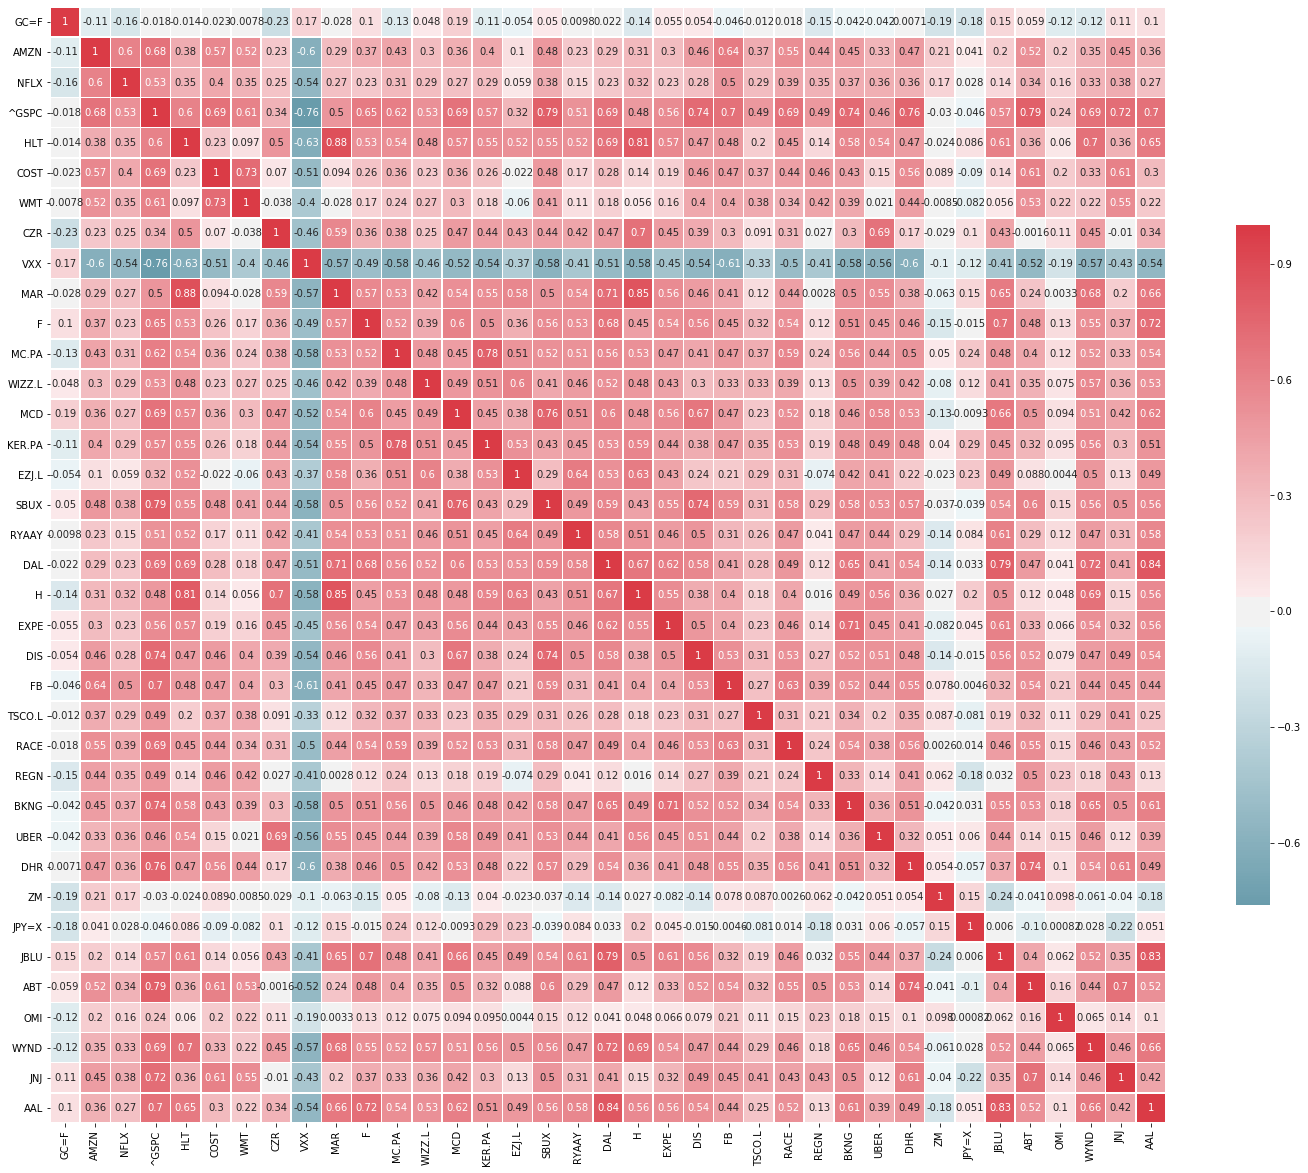

In [89]:
corr = port_returns.corr()
plot_corr_matrix(corr)

In [99]:
avg_return_a = round(port_returns.mean() * 250, 4)
print ("Portfolio's average yearly return is: \n", avg_return_a)

Portfolio's average yearly return is: 
 GC=F      0.1884
AMZN      0.2204
NFLX      0.3037
^GSPC     0.1748
HLT       0.1952
COST      0.3065
WMT       0.1713
CZR       0.5386
VXX      -0.0615
MAR       0.0330
F        -0.0622
MC.PA     0.4519
WIZZ.L    0.4056
MCD       0.1897
KER.PA    0.4186
EZJ.L     0.1884
SBUX      0.2556
RYAAY     0.1385
DAL      -0.2615
H        -0.0541
EXPE     -0.1035
DIS       0.1115
FB        0.3179
TSCO.L    0.2445
RACE      0.6095
REGN      0.2775
BKNG      0.0386
UBER     -0.1535
DHR       0.3662
ZM        0.4684
JPY=X     0.0620
JBLU     -0.1385
ABT       0.2725
OMI       0.0293
WYND      0.3272
JNJ       0.1202
AAL      -0.4424
dtype: float64
